<a href="https://colab.research.google.com/github/nounou-mimi/SIC-checkpoints/blob/main/checkpoint3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 3 : Data preprocessing and data visualization

In [368]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Part 1 : Data preprocessing

Loading the dataset and showing the first 5 lines

In [ ]:
from google.colab import files
files.upload()

In [370]:
data=pd.read_csv("titanic-passengers.csv",sep=';') 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


Some general informations about our dataset

In [371]:
print("Shape : ",data.shape)
print("\nColumns : ",data.columns)
print("\nSome statistics : \n",data.describe())

Shape :  (891, 12)

Columns :  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Some statistics : 
        PassengerId      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    3.000000   80.000000    8.000000    6.000000  512.329200


### a) Dealing with missing values

From these statistics we can already detect more than a hundred missing values in the age column (count = 714 < 891).
Also, by taking a quick look to our dataframe's head, we can notice that there are some missing values (NaN) in the *cabin* column.
 
To detect all missing values in the dataframe, we're going to count them by column

In [372]:
print("number of missing values per column\n",data.isnull().sum(),"\n\n")

#we can devide by the number of rows to get the proportion of null values in each column
print("proportion of missing values per column\n",data.isnull().sum()/data.shape[0])

number of missing values per column
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 


proportion of missing values per column
 PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


We notice that nearly 80% of cabin values are missing, trying to fill in all these blanks may result in a corrupted and distorted dataset.  Moreover, "cabin" is not a limited variable where we have just a few possible values, the values are codes consisting in letters and numbers, possibly unique for each passenger or family of passengers (see the code below).

In [373]:
data['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
C22 C26        3
E101           3
              ..
C47            1
A26            1
E10            1
C86            1
F38            1
Name: Cabin, Length: 147, dtype: int64


So I personnally **choose to drop this column**, even though the output "Survived" certainly depends on this feature.

However, I will keep a subset of the dataframe where cabin values are not null in another dataframe object, just in case.

In [374]:
data2=data[data['Cabin'].isnull()==False]
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
16,378,No,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
19,225,Yes,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
26,588,Yes,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C
...,...,...,...,...,...,...,...,...,...,...,...,...
862,619,Yes,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S
863,858,Yes,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
865,196,Yes,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
875,463,No,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S


In [375]:
data=data.drop(['Cabin'],axis=1)

As for the age and embarked columns, we have respectively around 20% and 0.3% missing values. 


* **Age column** : we are going to inspect correlations between age and other features in order to select those by which we're going to group our data by and then replace missing values by the median of these groups.

*  **Embarked column** : we can just drop the rows where values are missing,there are only two rows over 891


In [376]:
#correlations between pairs of features
print(data.corr())
print("\n\n")
#correlations between age and other features
print(data.corr().abs()['Age'].sort_values(ascending=False))

             PassengerId    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.035144  0.036847 -0.057527 -0.001652  0.012658
Pclass         -0.035144  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age             0.036847 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp          -0.057527  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch          -0.001652  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare            0.012658 -0.549500  0.096067  0.159651  0.216225  1.000000



Age            1.000000
Pclass         0.369226
SibSp          0.308247
Parch          0.189119
Fare           0.096067
PassengerId    0.036847
Name: Age, dtype: float64


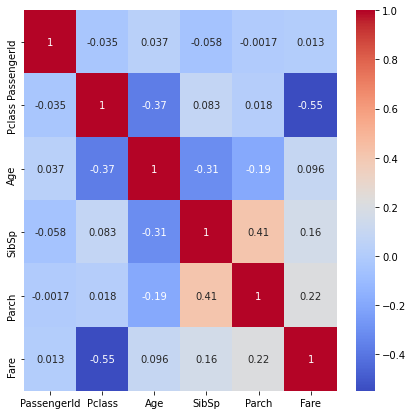

In [377]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')


In [378]:
data.groupby(['SibSp','Pclass'])['Age'].median()

SibSp  Pclass
0      1         37.0
       2         30.0
       3         26.0
1      1         38.0
       2         29.0
       3         25.0
2      1         44.0
       2         23.5
       3         19.5
3      1         23.0
       2         30.0
       3          6.0
4      3          6.5
5      3         11.0
8      3          NaN
Name: Age, dtype: float64

In [379]:
#replacing the missing values of 'Age' by medians of groups of the same SibSp and pclass
#2 WAYS TO DO IT (I commented one of them)
#data['Age']=data.groupby(['SibSp','Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))
data['Age'].fillna(data.groupby(['SibSp','Pclass'])['Age'].transform('median'),inplace=True)

#checking that there are no more missing values using a mask
data[data['Age'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
108,181,No,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,S
203,325,No,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,S
333,202,No,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,S
381,847,No,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,S
491,864,No,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,S
549,160,No,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,S
672,793,No,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,S


>The missing values that have not been replaced are all from passengers of the third class that have 8 siblings/spouse. When we take a deeper look, we can notice that they are all from the same family (Sage) 

>Let's try to find a tendency in the evolution of ages according to sibsp : **on the plot** below we can notice that the higher the SipSp feature is the younger the passenger is (especially if he's from the 3rd class) 

>Thus, we can estimate that the passengers that have SibSp=8 and Pclass=3 are young children, siblings from the same family... we'll consider that they are around 10.

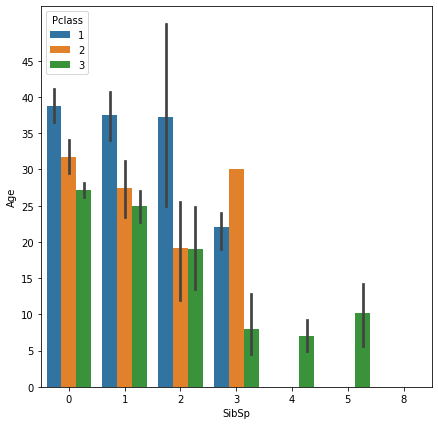

In [380]:
plt.figure(figsize=(7,7))
a=sns.barplot(x='SibSp',y='Age',hue='Pclass',data=data)
a.set_yticks(range(0,50,5))

In [381]:
data['Age'].fillna(10,inplace=True)

In [382]:
#checking that there are no more missing values using a mask
data[data['Age'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


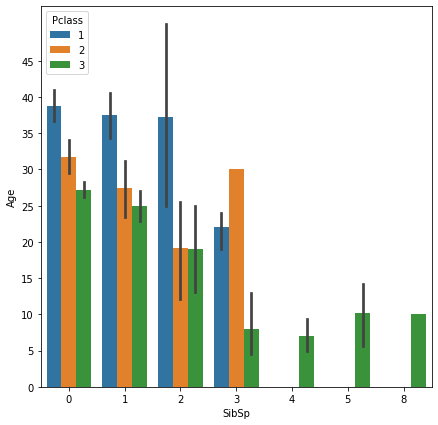

In [383]:
plt.figure(figsize=(7,7))
a=sns.barplot(x='SibSp',y='Age',hue='Pclass',data=data)
a.set_yticks(range(0,50,5))

In [384]:
#dropping rows that contain null values for embarked
data.dropna(subset=['Embarked'],inplace=True)

#checking
print(data[data['Embarked'].isnull()==True])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []


We finished the data cleaning !


---



###b) Feature transformation

In order to be able to plot graphs that include categorical variables like "Embarked" easily, I chose to transform them into numerical features later on.

In [385]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,26.0,0,0,349215,7.8958,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,S


In [386]:
data.reset_index(inplace=True)
data.tail()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
884,886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
885,887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
886,888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S
887,889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,26.0,0,0,349215,7.8958,S
888,890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,S


In [387]:
data.drop(['index'],axis=1)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
884,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
885,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
886,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S
887,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,26.0,0,0,349215,7.8958,S


## Part 2 : Data visualization

###a) Distributions of the most important features

most important features :


*   Age
*   Pclass and fare
*   SibSp and Parch as members of the family
*   Sex



####Sex

Text(0.5, 0.98, 'Age and Sex')

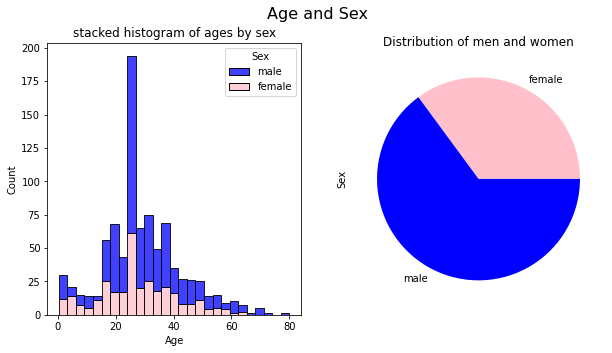

In [388]:
fig,axs=plt.subplots(ncols=2,figsize=(10,5))
sns.histplot(x='Age',hue='Sex',multiple='stack',data=data,ax=axs[0],palette={'male':'blue','female':'pink'})
axs[0].title.set_text("stacked histogram of ages by sex")
sex=data.groupby('Sex')['Sex'].count()
axs[1]=sex.plot.pie(colors=['pink','blue'])
axs[1].title.set_text('Distribution of men and women')
fig.suptitle('Age and Sex', fontsize=16)



> Age has the same distribution shape for both sexes. There are approximately twice more males than females (2 thirds of males, 1 third of females)




####Fare

(0.0, 100.0)

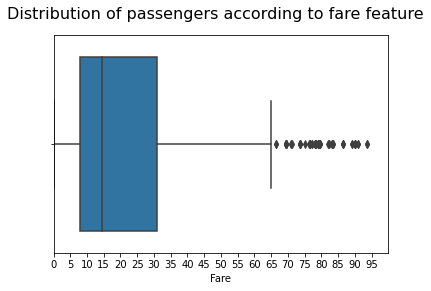

In [389]:
fig=plt.figure()
a=sns.boxplot(x=data['Fare'])
fig.suptitle('Distribution of passengers according to fare feature', fontsize=16)
a.set_xticks(range(0,100,5))
plt.xlim(0,100)





> Half of the passengers paid less than 15, whereas there was fewer wealthier people that paid up to 500 (outliers)





####Pclass

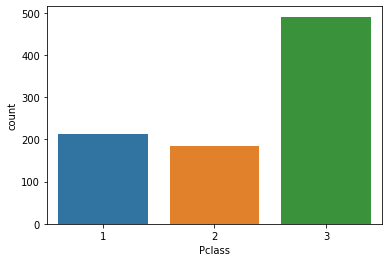

In [390]:
sns.countplot(x='Pclass',data=data)

####SibSp and Parch

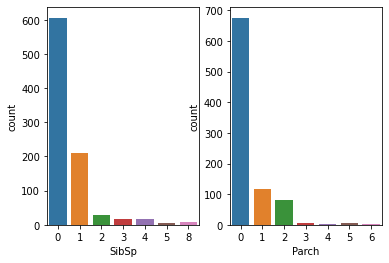

In [391]:
fig,axs=plt.subplots(ncols=2)
sns.countplot(x='SibSp',data=data,ax=axs[0])
sns.countplot(x='Parch',data=data,ax=axs[1])

Most of the passengers travelled alone

###b) Visualizing the correlation between Sex and Age in a plot. 
The visualized plot should give us obvious deductions concerning the importance of age and sex in the survival of the individuals.



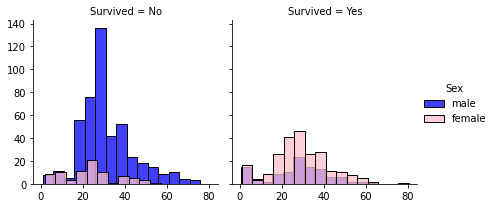

In [392]:
h=sns.FacetGrid(data,col='Survived',hue='Sex',palette={'male':"blue",'female':"pink"})
h.map_dataframe(sns.histplot,x='Age',binwidth=5,common_bins=True)
h.add_legend()


We notice that :
* Kids of age below 15 had equal chances of surviving weather they were boys or girls, and most of them survived
* Persons aged 15 and above had higher chances of surviving if they were females. 
 
***Women and children first !***

###c) Impact of various features on the output  (survival)


####Survival rate by age :


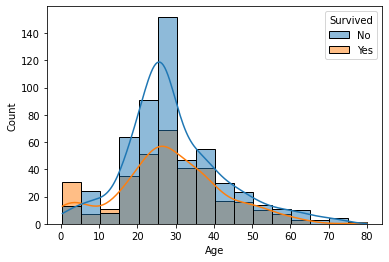

In [393]:
sns.histplot(x='Age',hue='Survived',data=data,kde=True,bins=16)

The distribution plot shows clearly that :
* Children younger than 5 years have a higher chance of surviving the shipwreck
* Adults between 20 and 40 years old have a higher chance of drowning



####Fare and pclass :

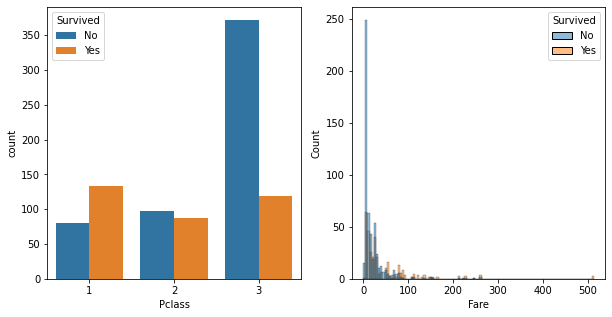

In [394]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
sns.countplot(x='Pclass', hue='Survived', data=data,ax=axs[0])
sns.histplot(x='Fare',hue='Survived',data=data,ax=axs[1])


* We notice above that the class that counts the higher rate of death is the third one (thrice more deaths than survivals), and also that for those who paid below low Fare must of them died. 
* The second class had about as much survivals as deaths
* The first class had 1.5 more survivals than deaths

#### Number of family members (siblings, spouse, parents, children)

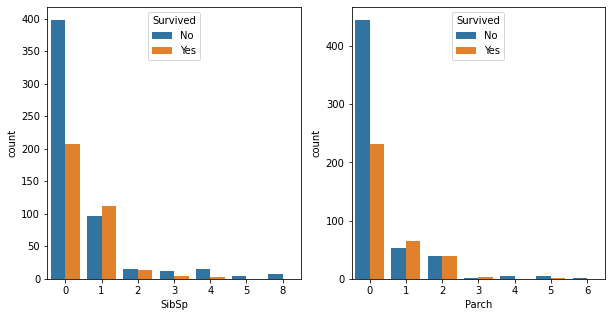

In [395]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
sns.countplot(x='SibSp', hue='Survived', data=data,ax=axs[0])
sns.countplot(x='Parch',hue='Survived',data=data,ax=axs[1])

We can clearly see the similarity between the distribution of the target among the two features. 
* We notice that those who have no family members (0 sibsp and 0 parch) have twice as much risk not to survive than to survive (ratio of 400 to 200)
* Those who have many family members (high SibSp -3and greater- and also a high Parch value -greater than 3, meaning they have children-) have higher risk of drowning 

###d) Heatmap of correlations


In [396]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

The above function creates a heatmap of correlations between pairs of features of a dataframe 

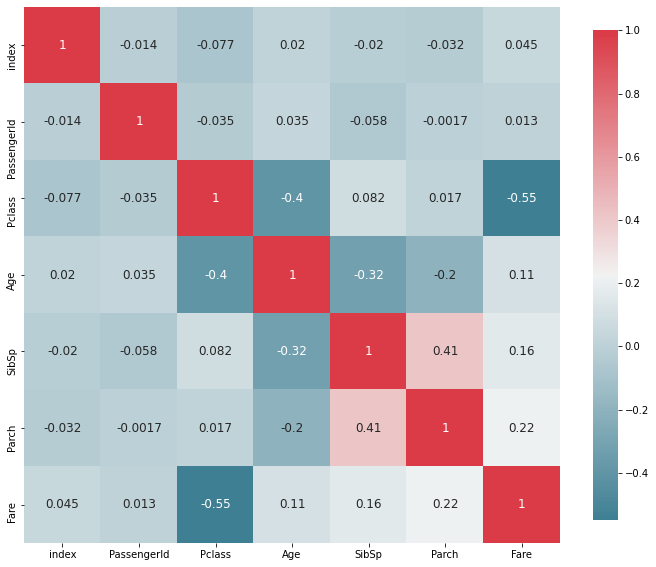

In [397]:
plot_correlation_map(data)

We see that there is some correlation between **SibSp and Parch**, between **Pclass and Fare**, between **Age and Pclass**, and finally between **SibSp and Age**. Indeed :

Text(0.5, 1.0, 'Pclass and Age')

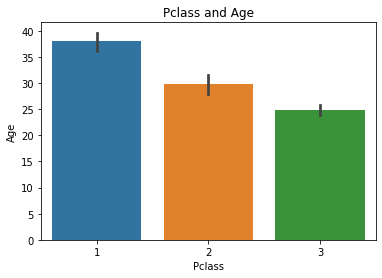

In [398]:
sns.barplot(x='Pclass',y='Age',data=data)
plt.title('Pclass and Age')

Text(0.5, 1.0, 'SibSp and Parch')

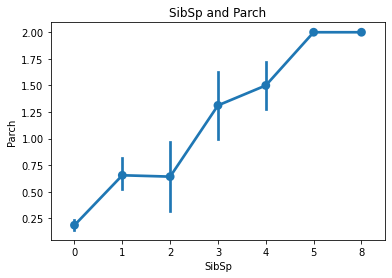

In [399]:
sns.pointplot(x='SibSp',y='Parch',data=data)
plt.title("SibSp and Parch")

Text(0.5, 1.0, 'Pclass and Fare')

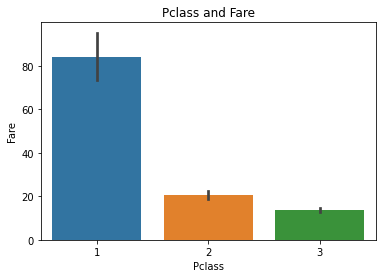

In [400]:
sns.barplot(x='Pclass',y='Fare',data=data)
plt.title('Pclass and Fare')

Text(0.5, 1.0, 'SibSp and Age')

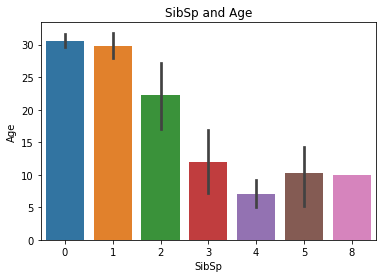

In [401]:
sns.barplot(x='SibSp',y='Age',data=data)
plt.title('SibSp and Age')

####Feature transformation

The resulting plot of "plot_correlation_map" applied on our dataframe shows correlations between pairs of numerical features. We must transform categorical features now to get all correlations. 

The categorical features appear as being from the type "object"

In [402]:
data.dtypes

index            int64
PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [403]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [404]:
df2=pd.get_dummies(data['Embarked'])
data=data.drop('Embarked',axis=1)
data=data.join(df2)


In [405]:
dictionary={'Survived':{'Yes':1,'No':0}}
data.replace(dictionary,inplace=True)
data.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,0,0,1
1,1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,0,0,1
2,2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,0,0,1
3,3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,0,0,1
4,4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,0,0,1


In [406]:
data.replace({'Sex':{'male':0,'female':1}},inplace=True)

In [407]:
data.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,0,0,1
1,1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,0,0,1
2,2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,0,0,1
3,3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,0,0,1
4,4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,0,0,1


In [408]:
data.drop(['index'],axis=1,inplace=True)

#### Feature selection



*   PassengerId doesn't have any effect on target, we can drop this column
*   Ticket is the ticket number of the passenger, and since it is a random feature, we can drop it



In [409]:
data.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [410]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,13.0000,0,0,1
1,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,7.6500,0,0,1
2,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,7.8542,0,0,1
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,21.0750,0,0,1
4,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,52.0000,0,0,1


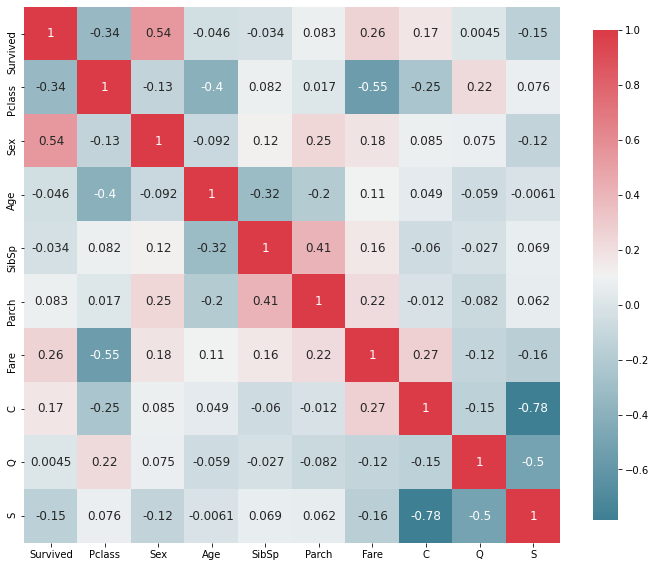

In [411]:
plot_correlation_map(data)

From this plot we can extract this information : 

The target (Survived) is mainly correlated with **Sex** feature, **Pclass** feature and **Fare** feature (the two lattered are already correlated). Indeed, women and passengers of the 1st class had the highest chances of surviving the shipwreck



###e) Relationship between Pclass and Survived

Since Survived has 0's and 1's, the mean will simply give us the proportion of passengers who survived among all passengers

In [412]:
data.groupby('Pclass')['Survived'].mean()*100 #results in percentages

Pclass
1    62.616822
2    47.282609
3    24.236253
Name: Survived, dtype: float64

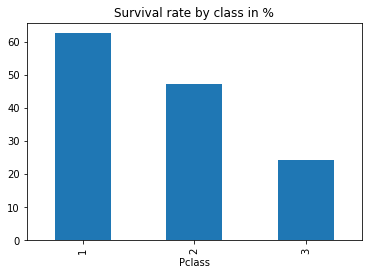

In [413]:
(data.groupby('Pclass')['Survived'].mean()*100).plot(kind='bar',title='Survival rate by class in %')

###f) Dropping useless columns such as Names

In [414]:
names=data.pop('Name')
print(names)
print(data)

0                             Collander, Mr. Erik Gustaf
1                                Moen, Mr. Sigurd Hansen
2                                 Jensen, Mr. Hans Peder
3            Palsson, Mrs. Nils (Alma Cornelia Berglund)
4                                 Davidson, Mr. Thornton
                             ...                        
884                  Nasser, Mrs. Nicholas (Adele Achem)
885                                Sirayanian, Mr. Orsen
886                                  Cacic, Miss. Marija
887                     Petroff, Mr. Pastcho ("Pentcho")
888    Phillips, Miss. Kate Florence ("Mrs Kate Louis...
Name: Name, Length: 889, dtype: object
     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  C  Q  S
0           0       2    0  28.0      0      0  13.0000  0  0  1
1           0       3    0  25.0      0      0   7.6500  0  0  1
2           0       3    0  20.0      0      0   7.8542  0  0  1
3           0       3    1  29.0      0      4  21.0750  0  0  1
4        

###g) New column : Title



In [415]:
title=[]
for name in names:
  title.append(name.split(',')[1].strip().split('.')[0])
pd.Series(title)

0        Mr
1        Mr
2        Mr
3       Mrs
4        Mr
       ... 
884     Mrs
885      Mr
886    Miss
887      Mr
888    Miss
Length: 889, dtype: object

In [416]:
data['Title']=title


In [417]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Title
0,0,2,0,28.0,0,0,13.0000,0,0,1,Mr
1,0,3,0,25.0,0,0,7.6500,0,0,1,Mr
2,0,3,0,20.0,0,0,7.8542,0,0,1,Mr
3,0,3,1,29.0,0,4,21.0750,0,0,1,Mrs
4,0,1,0,31.0,1,0,52.0000,0,0,1,Mr


###h) Visualizing the correlation between Title and other features

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

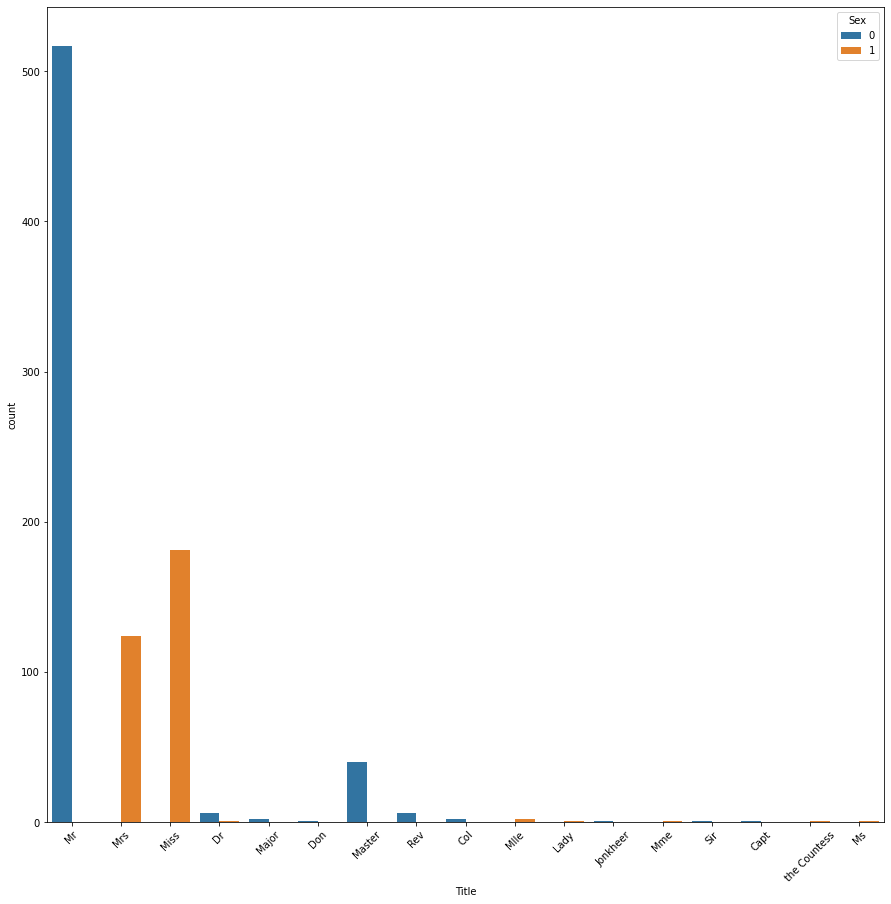

In [418]:
plt.figure(figsize=(15,15))
a=sns.countplot(x='Title',hue='Sex',data=data)
plt.xticks(rotation=45)


Most of titles determine the Sex of the passenger (either male or female), except for "Dr" that accepts both genders (with a higher number of male doctors, though).

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

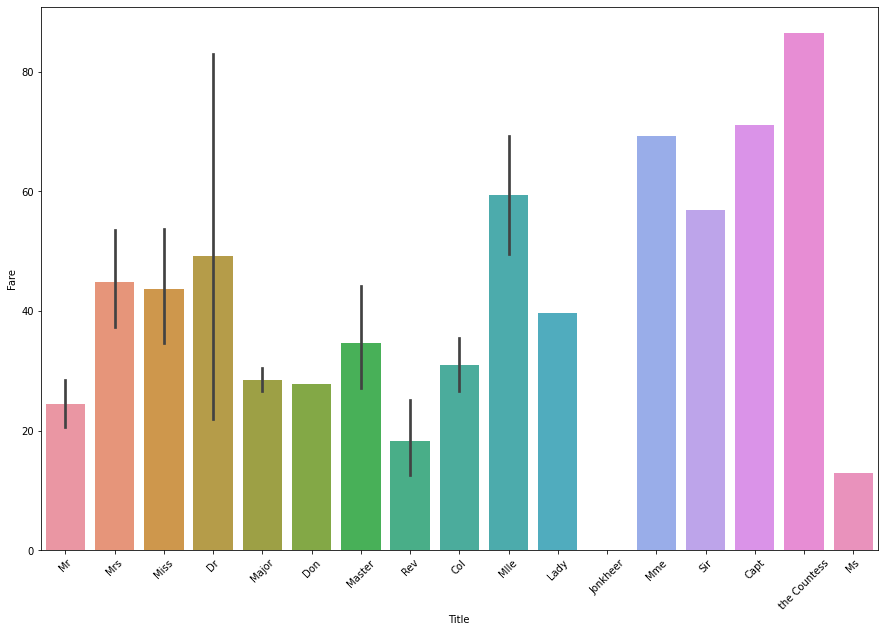

In [419]:
plt.figure(figsize=(15,10))
sns.barplot(x='Title', y='Fare',data=data)
plt.xticks(rotation=45)


In [420]:
data[data['Title']=='Jonkheer']

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Title
519,0,1,0,38.0,0,0,0.0,0,0,1,Jonkheer


In [421]:
names[519]

'Reuchlin, Jonkheer. John George'

Explanation of this appearent anomaly of 0.0 Fare for a passenger : "He boarded the Titanic at Cherbourg as first class passenger carrying ticket number 19972. The ticket was complimentary because of his position with the Holland America Line which was part of the International Mercantile Marine, J. Pierpont Morgan's conglomerate that also owned the White Star Line." _[encyclopedia titanica](https://www.encyclopedia-titanica.org/titanic-victim/johan-george-reuchlin.html)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

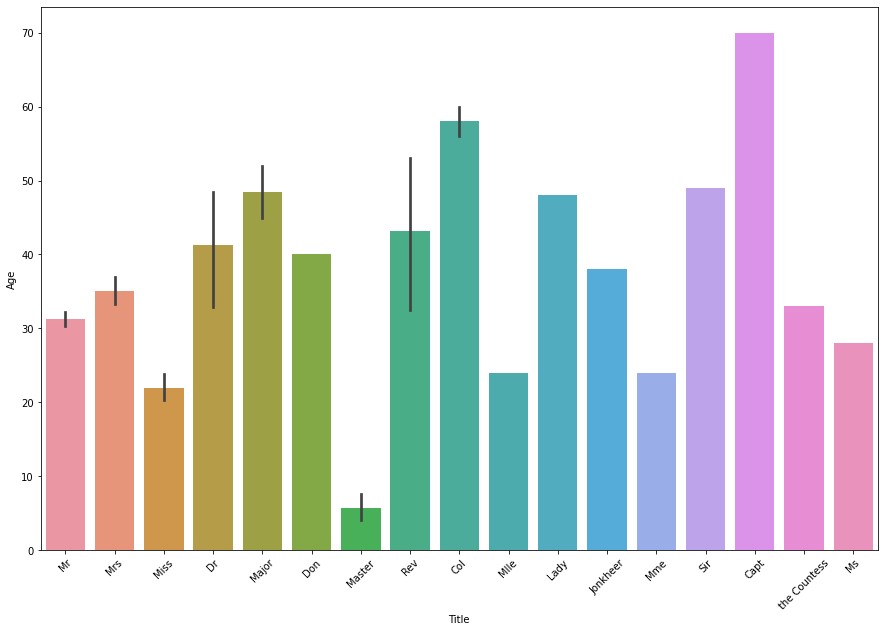

In [422]:
plt.figure(figsize=(15,10))
sns.barplot(x='Title', y='Age',data=data)
plt.xticks(rotation=45)


In [423]:
Title_Dictionary = {"Capt":       "Officer", 
                    "Col":        "Officer",
                    "Major":      "Officer",
                      "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                   "Lady" :      "Royalty",
                  "the Countess": "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs",
                    "Master" :    "Master"
                    }
dict={'Title':Title_Dictionary}
data.replace(dict,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Title
0,0,2,0,28.0,0,0,13.0000,0,0,1,Mrs
1,0,3,0,25.0,0,0,7.6500,0,0,1,Mrs
2,0,3,0,20.0,0,0,7.8542,0,0,1,Mrs
3,0,3,1,29.0,0,4,21.0750,0,0,1,Mrs
4,0,1,0,31.0,1,0,52.0000,0,0,1,Mrs


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

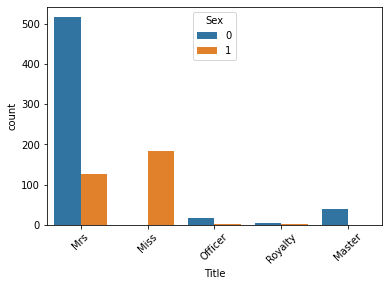

In [424]:
a=sns.countplot(x='Title',hue='Sex',data=data)
plt.xticks(rotation=45)


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

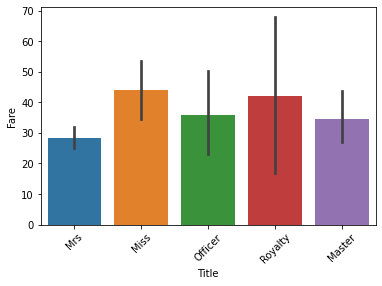

In [425]:
sns.barplot(x='Title', y='Fare',data=data)
plt.xticks(rotation=45)


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

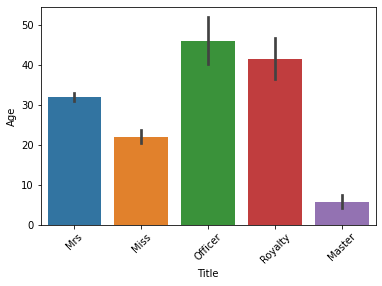

In [426]:
sns.barplot(x='Title', y='Age',data=data)
plt.xticks(rotation=45)


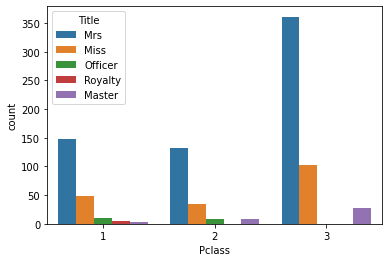

In [427]:
sns.countplot(x='Pclass',hue='Title',data=data)

We can notice that 
* all royalty people are in the 1st class
* Mrs and Mrs and Miss are twice as numerous in the third class than the 1st and 2nd class
* There are as many Officers in the 1st as 2nd class

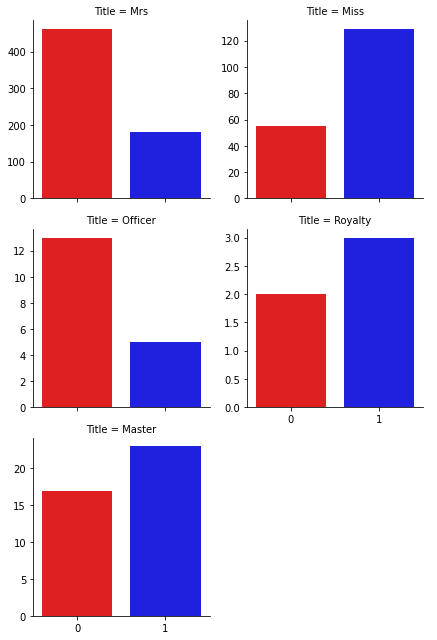

In [429]:
g=sns.FacetGrid(data=data,col='Title',height=3,col_wrap=2, sharey=False)
g.map_dataframe(sns.countplot,x='Survived',palette={0:'red',1:'blue'})
g.add_legend()

Misses, Royalities and Masters(young boys) had higher chances of surviving than dying.

###i) New feature : FamilySize

In [262]:
data['FamilySize']=data['Parch']+data['SibSp']+1
data.drop(['Parch','SibSp'],axis=1,inplace=True)

In [263]:
data.head()

,Survived,Pclass,Sex,Age,Fare,C,Q,S,Title,FamilySize
0,0,2,0,28.0,13.0000,0,0,1,Mrs,1
1,0,3,0,25.0,7.6500,0,0,1,Mrs,1
2,0,3,0,20.0,7.8542,0,0,1,Mrs,1
3,0,3,1,29.0,21.0750,0,0,1,Mrs,5
4,0,1,0,31.0,52.0000,0,0,1,Mrs,2


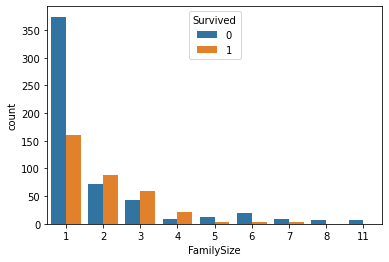

In [264]:
sns.countplot(x='FamilySize',hue='Survived',data=data)

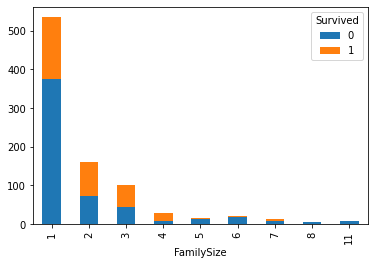

In [265]:
data.groupby(['FamilySize','Survived'])['FamilySize'].size().unstack().plot(kind='bar',stacked=True)

(0.0, 100.0)

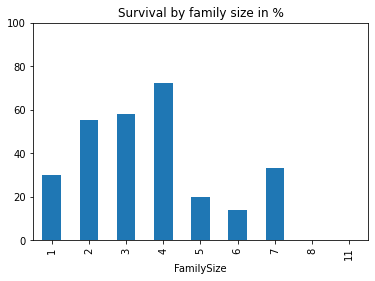

In [266]:
((data.groupby(['FamilySize'])['Survived'].mean())*100).plot(kind='bar')
plt.title("Survival by family size in %")
plt.ylim(0,100)

We can conclude from this plot that for families of 1 (meaning that the passenger is alone) or 5 or more people, survival rate is low (0 for family sizes of 8 and 11). Whereas for small families from 2 to 4 people, survival rate is pretty high.

The family size seems to be a interesting feature, along with the Sex feature... let's try to combine them and see what we get

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


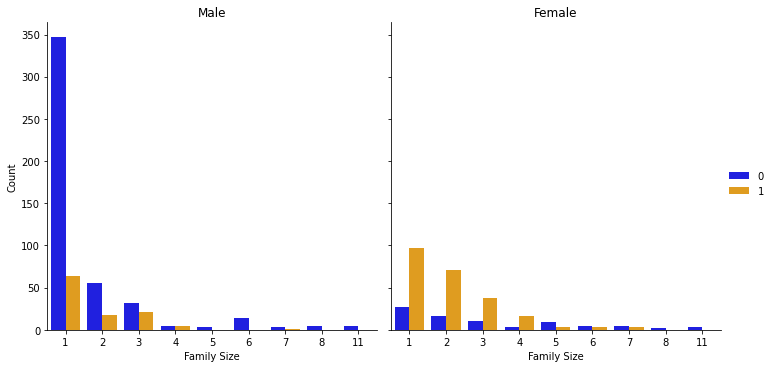

In [267]:
k=sns.FacetGrid(data=data,col='Sex',size=5)
k.map_dataframe(sns.countplot,x='FamilySize',hue='Survived',palette=['blue','orange'])
k.add_legend()
axes = k.axes.flatten()
axes[0].set_title("Male")
axes[1].set_title("Female")
axes[0].set_ylabel("Count")
for ax in axes:
  ax.set_xlabel("Family Size")
  

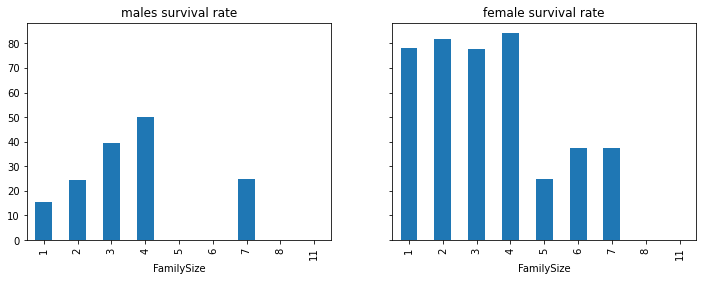

In [268]:
male=data[data['Sex']==0]
female=data[data.Sex==1]
fig,axs=plt.subplots(ncols=2,sharey=True)
fig.set_figwidth(12)

((male.groupby(['FamilySize'])['Survived'].mean())*100).plot(kind='bar',ax=axs[0],title="males survival rate")
((female.groupby(['FamilySize'])['Survived'].mean())*100).plot(kind='bar',ax=axs[1],title="female survival rate")



* females in families that have less or equal to 4 members have a stable survival rate of about 80% 
* family sizes up to 4 have an increasing survival rate for males (up to 50%)
* family sizes bigger than 4 have low survival rate for both genders, generally null for men 

Text(0.5, 0.98, 'Survival by family size and sex in %')

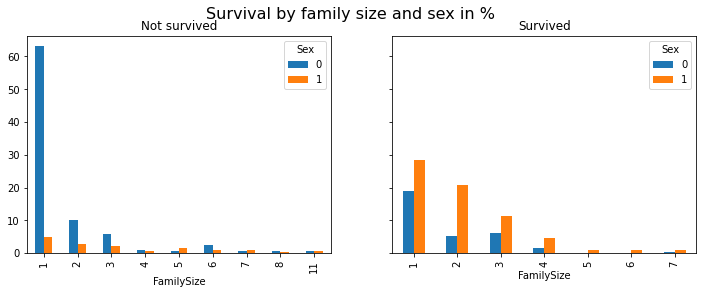

In [269]:
no=data[data['Survived']==0]
yes=data[data.Survived==1]
fig,axs=plt.subplots(ncols=2,sharey=True)
fig.set_figwidth(12)

((no.groupby(['FamilySize','Sex'])['Sex'].size().unstack())*(100/no.shape[0])).plot(kind='bar',ax=axs[0],title="Not survived")
((yes.groupby(['FamilySize','Sex'])['Sex'].size().unstack())*(100/yes.shape[0])).plot(kind='bar',ax=axs[1],title="Survived")
fig.suptitle('Survival by family size and sex in %', fontsize=16)


>more than 60% of those who have not survived are lonely men

##Conclusion : 

> Distributions of some features 
* Sex : There was twice more males than females on the Titanic 
* Fare : Half passengers had a fare < 15 
* Pclass : Most of the passengers travelled in 3rd class
* Parch / SibsSp : Most of the passengers travelled alone

> Correlation between Sex and Age and Survival
to sum up : "Women and children first !"

> Impact of various features on the target (survival)
* Age : Children survived more
* Fare and Pclass : The third class had thrice more deaths than survivals, the second had about the same amount of deaths and survivals, and the first one had 1.5 more survivals than deaths
* SibSp and Parch : Those who have no family members or too many (more than 3 SibSp and more than 4 Parch) have higher risk of dying

> Heatmap of correlations : 
1. Correlations between features : 
>>* Pclass and Age : the lower the class the lower the average age
>>* SibSp and Parch : the more Siblings someone had, the highest Parent/children number average 
>>* Pclass and Fare : the lower the class, the lower the fare
>>* SibSp and Age : the more Siblings/Spouse the younger the passenger
2.Correlation between the Survived column and other features :
>> The target (Survived) is mainly correlated with **Sex** feature, **Pclass** feature and **Fare** feature (the two lattered are already correlated) : one had more chances of survival if he was from the high classes, or/and if she was a woman.

>Correlation between Title and the other columns :
* all royalty people are in the 1st class
* Mrs, Misters and Misses are twice as numerous in the third class than the 1st and 2nd class
* There are as many Officers in the 1st as 2nd class
*Misses, Royalities and Masters(young boys) had higher chances of surviving than dying.

> Family Size :
* FamilySize alone : for families of 1 (meaning that the passenger is alone) or 5 or more people, survival rate is low, even null for families of 8 and plus members. Whereas for small families from 2 to 4 people, survival rate is pretty high.
* FamilySize and Sex : 
>>* females in families that have less or equal to 4 members have a stable survival rate of about 80% 
>>* family sizes up to 4 have an increasing survival rate for males (up to 50%)
>>* family sizes bigger than 4 have low survival rate for both genders, generally null for men 

